In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

# Bisection method

In [4]:
def f(x):
    y = -5*x + 20
    return y


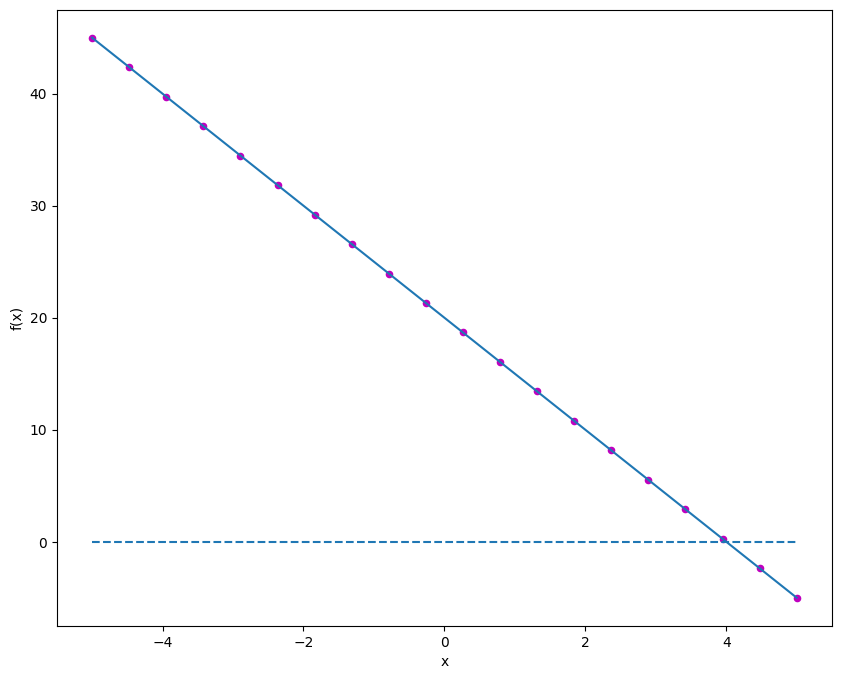

In [11]:
x = np.linspace(-5, 5, 20)
y = f(x)

_ = plt.figure(figsize=(10, 8))
plt.plot(x, y)
plt.scatter(x, y, s=20, c="m")
plt.hlines(0, -5, 5, linestyles="dashed")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [13]:
a = 2
b = 5 
N = 100

def bisection(f, a, b, N):
    if f(a) * f(b) >= 0:
        print("Method failed. Please select a different interval")
        return 
    
    a_n = a
    b_n = b
    for n in range(1, N+1):
        m = (a_n + b_n) / 2 
        f_m = f(m)

        if f(a_n) * f(m) < 0:
            a_n = a_n 
            b_n = m
        elif f(m) * f(b_n) < 0:
            a_n = m 
            b_n = b_n
        elif f_m == 0:
            print(f"We have a solution. x0 = {m}")
            return m 
        else:
            print("Method failed.")
    return (a_n + b_n) / 2

bisection(f, a, b, N)

We have a solution. x0 = 4.0


4.0

In [14]:
def g(x):
    y = x*x - 4*x + 4 # (x-2)^2
    return y

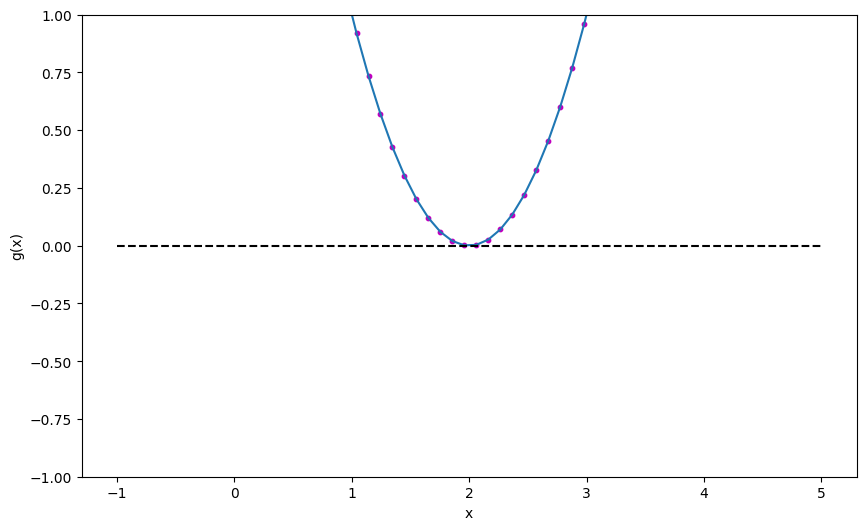

In [18]:
x = np.linspace(-1, 4)
y = g(x)

_ = plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.scatter(x, y, s=10, c="m")
plt.hlines(0, -1, 5, colors="k", linestyles="dashed")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.ylim(-1, 1)
plt.show()

In [19]:
a = 1
b = 3
N = 100
bisection(g, a, b, N)

Method failed. Please select a different interval


In [20]:
def h(x):
    y = x*x - x - 1
    return y

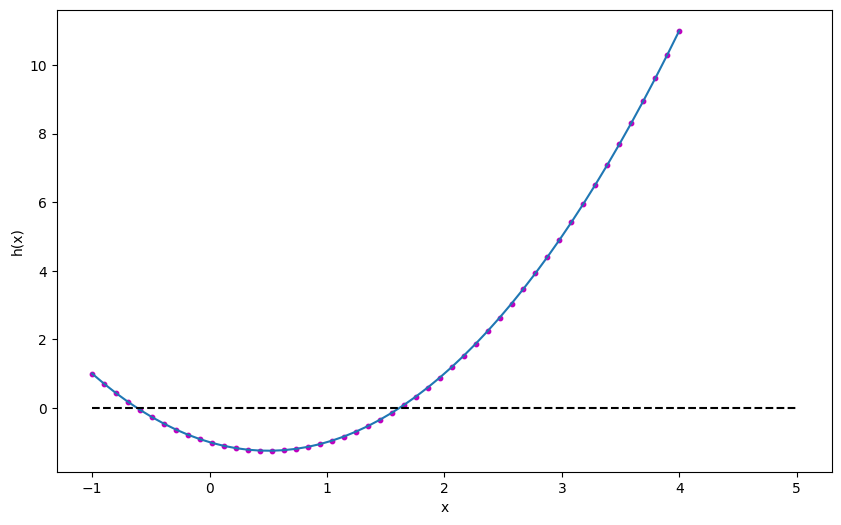

In [22]:
x = np.linspace(-1, 4)
y = h(x)

_ = plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.scatter(x, y, s=10, c="m")
plt.hlines(0, -1, 5, colors="k", linestyles="dashed")
plt.xlabel("x")
plt.ylabel("h(x)")
# plt.ylim(-1, 1)
plt.show()

In [23]:
a1 = -1
b1 = 0
a2 = 1
b2 = 2
N = 20

x1 = bisection(h, a1, b1, N)
x2 = bisection(h, a2, b2, N)

In [24]:
h(x1), h(x2)

(-2.2985454961599316e-07, -2.2985454961599316e-07)

In [27]:
e = 1e-10

N1 = np.log((b1-a1)/e) / np.log(2)
N1 = int(np.ceil(N1))

N2 = np.log((b2-a2)/e) / np.log(2)
N2 = int(np.ceil(N2))

print(N1, N2)

x1 = bisection(h, a1, b1, N1)
x2 = bisection(h, a2, b2, N2)

print(h(x1), h(x2))

34 34
-6.363620741467457e-11 -6.363620741467457e-11


Newton's Method

In [28]:
# y = f'(x0)(x - x0) + f(x0)
# 0 = f'(x0)(x - x0) + f(x0)
# x = x0 - f(x0) / f'(x0)
# Objective: Solve f(x) = 0

def Dh(x):
    y = 2*x - 1
    return y

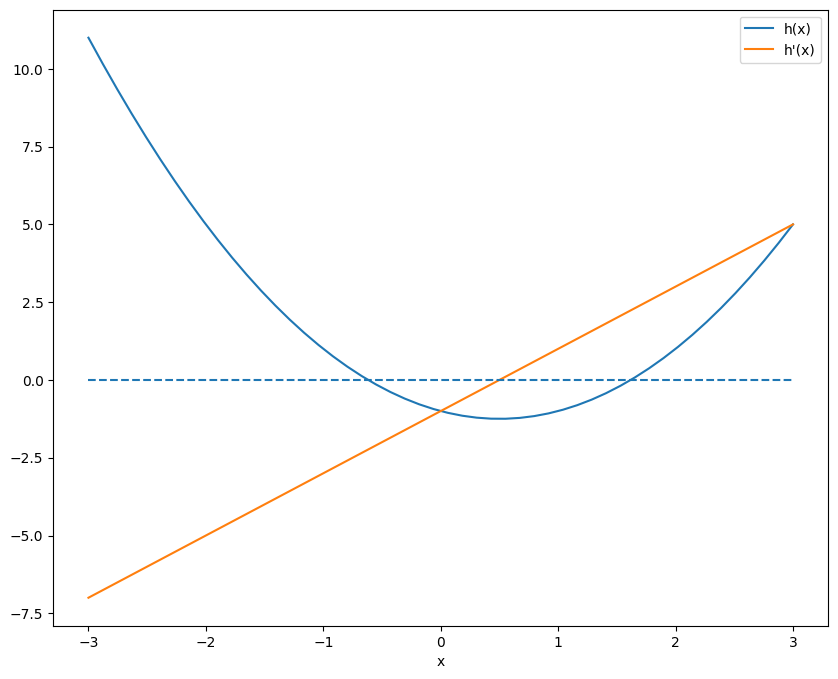

In [35]:
x = np.linspace(-3, 3)
y = h(x)
Dy = Dh(x)

_ = plt.figure(figsize=(10, 8))
plt.plot(x, y, label="h(x)")
plt.plot(x, Dy, label="h'(x)")
plt.hlines(0, -3, 3, linestyles="dashed")
plt.xlabel("x")
plt.legend()
plt.show()

In [41]:
def newton(f, Df, x0, eps, max_iter, real_x0=0):
    errors = []

    # Initial "guess" for the solution
    xn = x0
    error = real_x0 - xn
    errors.append(error)

    for n in range(max_iter):
        # Compute the value of the function
        fxn = f(xn)

        # Check if I found a solution 
        if abs(fxn) < eps:
            return xn, errors
        
        # Update the "guess" for the solution using
        # xn = xn - f(xn) / f'(xn)
        Dfxn = Df(xn)
        if Dfxn == 0:
            print("Zero derivative. No solution available.")
            return 
        
        xn = xn - fxn / Dfxn
        error = real_x0 - xn
        errors.append(error)

    print("Maximum number of iterations exceeded.")
    return xn, errors

In [36]:
x1 = newton(h, Dh, x0=-1, eps=0.00001, max_iter=100)
x2 = newton(h, Dh, x0=2, eps=0.0001, max_iter=100)
x1, x2

(-0.6180344478216819, 1.618034447821682)

In [44]:
def Dg(x):
    y = 2*x - 4
    return y

x0, errors = newton(g, Dg, x0=10, eps=0.000001, max_iter=100, real_x0=2)

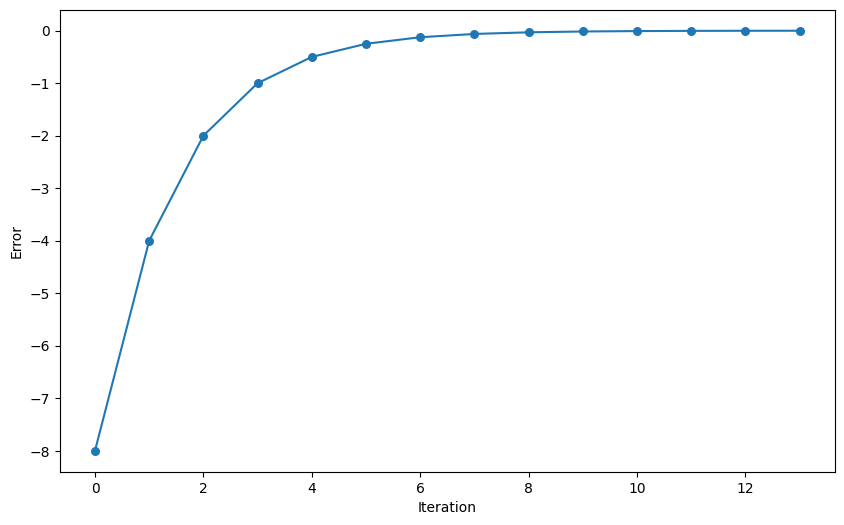

In [47]:
_ = plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors)
plt.scatter(range(len(errors)), errors, s=30)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

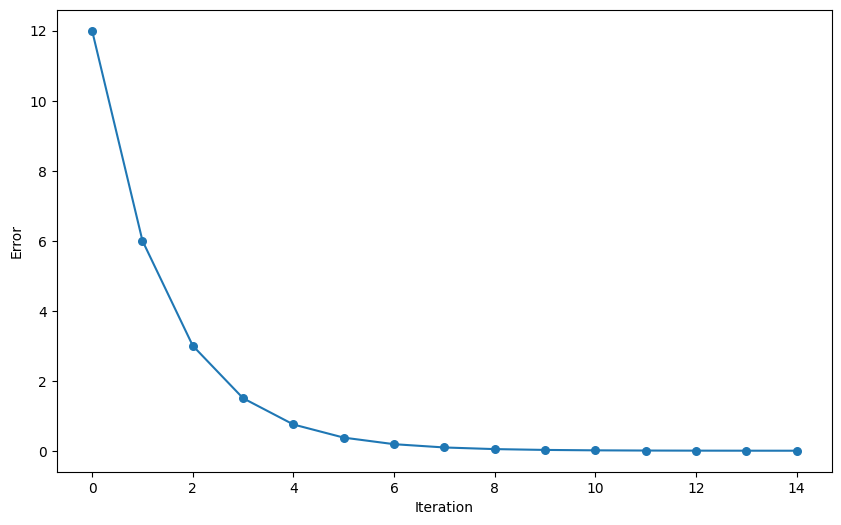

In [48]:
x0, errors = newton(g, Dg, x0=-10, eps=0.000001, max_iter=100, real_x0=2)

_ = plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors)
plt.scatter(range(len(errors)), errors, s=30)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

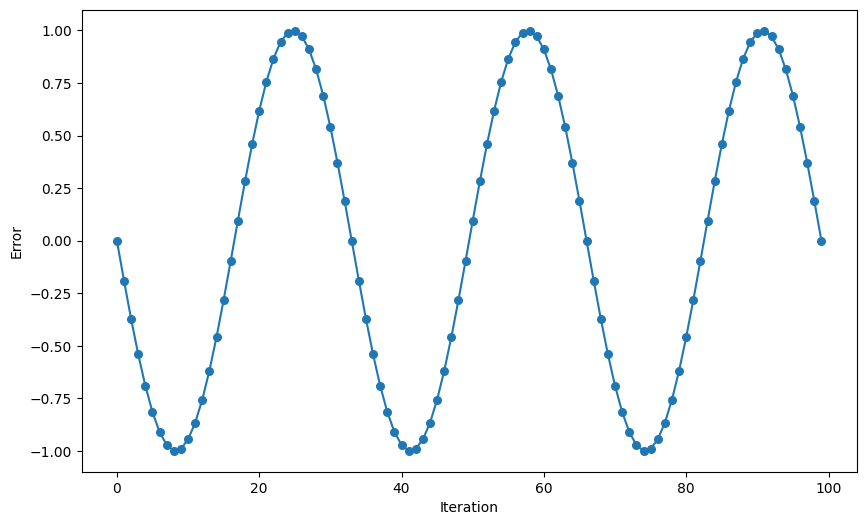

In [49]:
# "Uncontrolled" errors. Examples of errors you don't want to 
# see when developing / implementing a numerical method

# 1. Oscillations 
x = np.linspace(-3*np.pi, 3*np.pi, 100)
errors = np.sin(x)

_ = plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors)
plt.scatter(range(len(errors)), errors, s=30)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

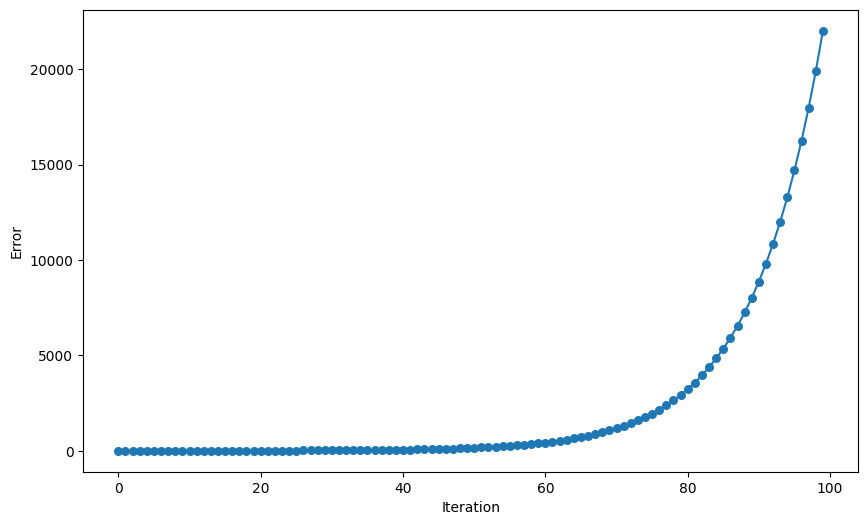

In [51]:
# 2. "Exploding"
x = np.linspace(0, 10, 100)
errors = np.exp(x)

_ = plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors)
plt.scatter(range(len(errors)), errors, s=30)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()